In [2]:
import matplotlib.pyplot as plt
import numpy as np

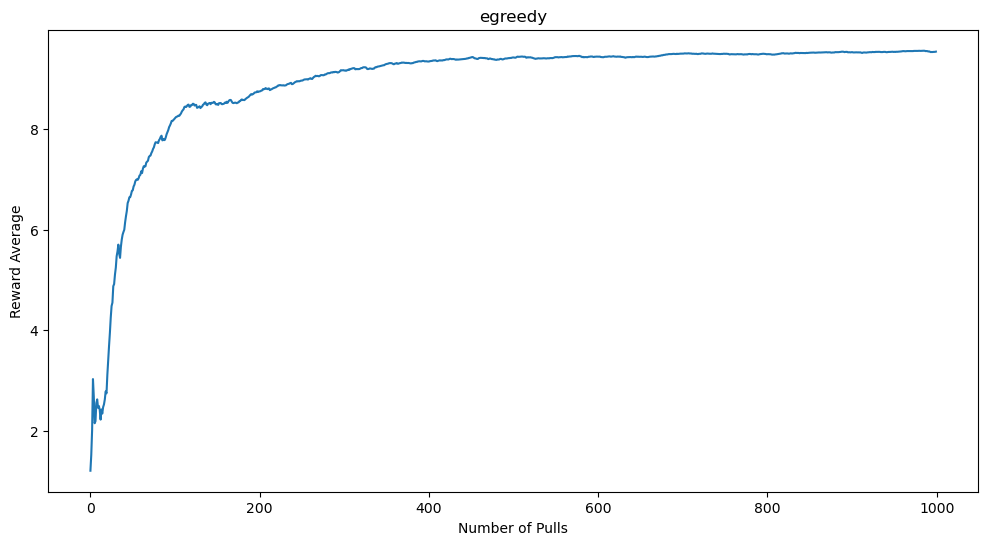

In [3]:
means = [3, 6, 10]
variance = 2
num_bandits = len(means)

num_steps = 1000

optimal_action = np.argmax(means)

epsilon = 0.1

estimated_values = np.zeros(num_bandits)
action_counts = np.zeros(num_bandits)

reward_history_egreedy = []
action_history_egreedy = []

def egreedy():
    if np.random.rand() < epsilon:
        return np.random.choice(num_bandits)
    else:
        return np.argmax(estimated_values)

for step in range(num_steps):
    action = egreedy()
    reward = np.random.normal(means[action], variance)
    
    action_counts[action] += 1
    estimated_values[action] += (reward - estimated_values[action]) / action_counts[action]
    
    reward_history_egreedy.append(reward)
    action_history_egreedy.append(action)

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(reward_history_egreedy) / (np.arange(num_steps) + 1))
plt.xlabel("Number of Pulls")
plt.ylabel("Reward Average")
plt.title('egreedy')
plt.show()


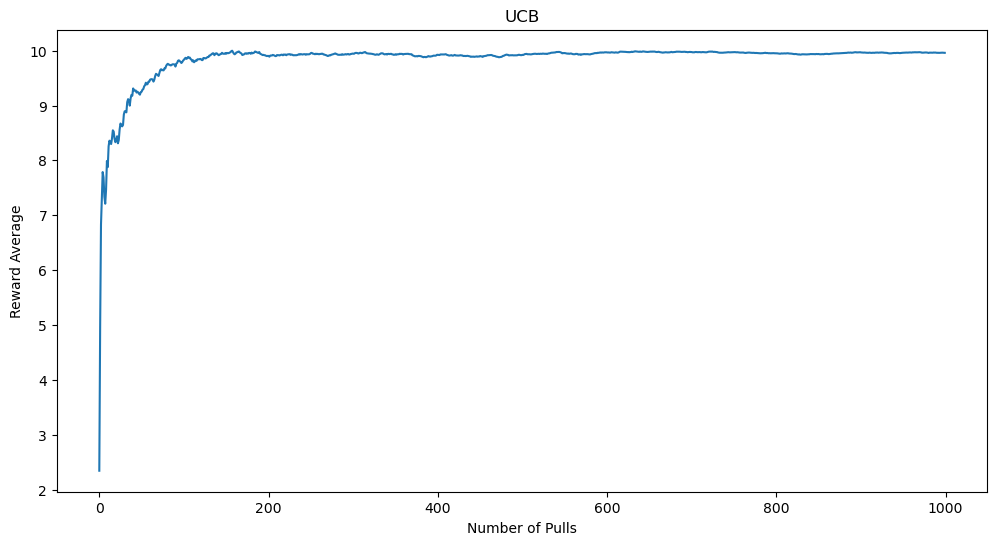

In [4]:
reward_history_ucb = []
action_history_ucb = []

def select_action_ucb():
    ucb_values = estimated_values + np.sqrt(2 * np.log(step + 1) / (action_counts + 1e-6))
    return np.argmax(ucb_values)

estimated_values = np.zeros(num_bandits)
action_counts = np.zeros(num_bandits)

for step in range(num_steps):
    action = select_action_ucb()
    reward = np.random.normal(means[action], variance)
    
    action_counts[action] += 1
    estimated_values[action] += (reward - estimated_values[action]) / action_counts[action]
    
    reward_history_ucb.append(reward)
    action_history_ucb.append(action)

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(reward_history_ucb) / (np.arange(num_steps) + 1))
plt.xlabel("Number of Pulls")
plt.ylabel("Reward Average")
plt.title('UCB')
plt.show()
